# Starbucks Offer Capston Machine Learning Engineer Nanodegree

In [1]:
#Importing all necessary libraries for data exploration, cleaning, visualization, and feature engineering

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import json
import math
import os

import seaborn as sns
from collections import defaultdict
import datetime


% matplotlib inline

In [2]:
#Converting JSON files into pandas dataframe for easy data cleaning

portfolio_df = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile_df = pd.read_json('data/profile.json', orient='records', lines=True)
transcript_df = pd.read_json('data/transcript.json', orient='records', lines=True)

In [3]:
#Make a copy of the original unaltered datasets
copy_portfolio_df = portfolio_df.copy()
copy_profile_df = profile_df.copy()
copy_transcript_df = transcript_df.copy()

## A. Check all three dataset  (just as it is) 

In [4]:
#Checking whether we have pandas df for all json coverts

print (type(portfolio_df), type(profile_df), type(transcript_df))

(<class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>)


### 1.Checking Portfolio

In [7]:
portfolio_df.head()

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5


In [8]:
portfolio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
channels      10 non-null object
difficulty    10 non-null int64
duration      10 non-null int64
id            10 non-null object
offer_type    10 non-null object
reward        10 non-null int64
dtypes: int64(3), object(3)
memory usage: 552.0+ bytes


In [10]:
#Checking the unique offer types 
portfolio_df['offer_type'].unique()

array([u'bogo', u'informational', u'discount'], dtype=object)

### 2. Checking Profile

In [11]:
profile_df.head(2)

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [12]:
profile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
age                 17000 non-null int64
became_member_on    17000 non-null int64
gender              14825 non-null object
id                  17000 non-null object
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.1+ KB


In [21]:
print(profile_df.gender.value_counts())
Male_pct = float(profile_df.gender.value_counts()[0]*1.00/profile_df.gender.value_counts().sum()*1.00)*100
Female_pct = float(profile_df.gender.value_counts()[1]*1.00/profile_df.gender.value_counts().sum()*1.00)*100
print("Male% in original sample: ", Male_pct)
print("Female% in orignal sample: ", Female_pct)

M    8484
F    6129
O     212
Name: gender, dtype: int64
('Male% in original sample: ', 57.227655986509276)
('Female% in orignal sample: ', 41.342327150084316)


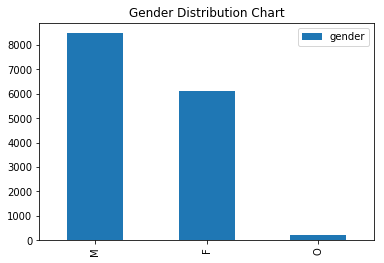

In [22]:
#Checking Gender Distribution
profile_df.gender.value_counts().plot(kind='bar' ,
                                       title="Gender Distribution Chart",  
                                       legend=True)

('Age mean :', 54.39352445193929, 'Age STD :', 17.38370536585499)


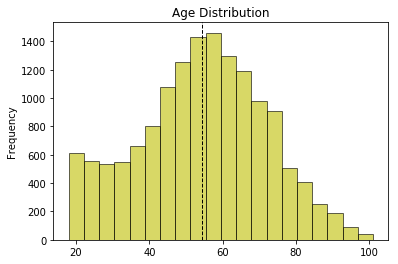

In [24]:
# Plot the ages (excluding the default age of 118) and also plot the mean line.
age_mean = profile_df[profile_df.age != 118].age.mean()
age_stddev = profile_df[profile_df.age != 118].age.std()
age_plot = profile_df[profile_df.age != 118].age.plot(kind='hist', 
                                                bins=20, 
                                                color='y', 
                                                edgecolor='k', 
                                                alpha=0.60,
                                                title="Age Distribution")
age_plot.axvline(age_mean, color='k', linestyle='dashed', linewidth=1)
print("Age mean :", age_mean, "Age STD :", age_stddev)

('Income mean :', 65404.9915682968, 'Income STD :', 21598.299410229574)


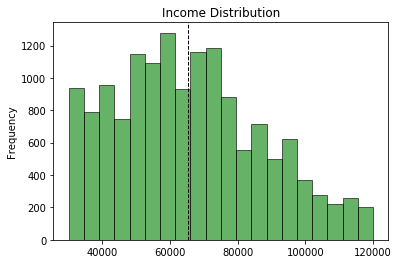

In [25]:
income_mean = profile_df.income.mean()
income_stddev = profile_df.income.std()
income_plot = profile_df.income.plot(kind='hist', 
                                  bins=20, 
                                  color='g', 
                                  edgecolor='k', 
                                  alpha=0.60, 
                                  title='Income Distribution')
income_plot.axvline(profile_df.income.mean(), color='k', linestyle='dashed', linewidth=1)
print("Income mean :", income_mean, "Income STD :", income_stddev)

### 3. Checking Transcript

In [27]:
transcript_df.head(2)

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{u'offer id': u'9b98b8c7a33c4b65b9aebfe6a799e6...
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{u'offer id': u'0b1e1539f2cc45b7b9fa7c272da2e1...


In [28]:
transcript_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
event     306534 non-null object
person    306534 non-null object
time      306534 non-null int64
value     306534 non-null object
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [29]:
transcript_df.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

('Offer_Success_Rate = ', 0.5817063663923776)


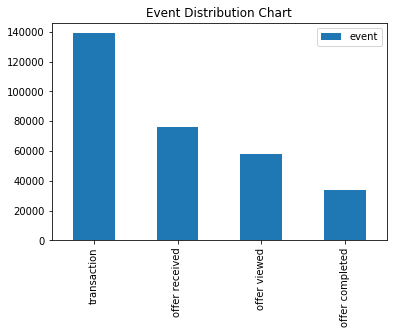

In [32]:
transcript_df.event.value_counts().plot(kind='bar' ,
                                       title="Event Distribution Chart",  
                                       legend=True)

#Offer_Success_Rate = Offer Completed / Offer Viewed
Offer_Success_Rate =  float(transcript_df.event.value_counts()[3] * 1.00 /
                            transcript_df.event.value_counts()[2] * 1.00) * 1.00
print("Offer_Success_Rate = ", Offer_Success_Rate)
#Before cleaning the offer success rate is 58%

## B. Cleaning the Data Sets

### 1. Clean Portfolio 

In [33]:
portfolio_df.head(2)

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10


In [34]:
#Shape before cleaning
portfolio_df.shape

(10, 6)

In [35]:
#OHE of channels
portfolio_df['web'] = portfolio_df['channels'].apply(lambda x: 1 if 'web' in x else 0)
portfolio_df['email'] = portfolio_df['channels'].apply(lambda x: 1 if 'email' in x else 0)
portfolio_df['mobile'] = portfolio_df['channels'].apply(lambda x: 1 if 'mobile' in x else 0)
portfolio_df['social'] = portfolio_df['channels'].apply(lambda x: 1 if 'social' in x else 0)

#drop channels column
portfolio_df.drop(['channels'], axis=1, inplace=True)    

In [37]:
portfolio_df.head(10)

,difficulty,duration,id,offer_type,reward,web,email,mobile,social
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,0,1,1,1
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,1,0
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,1,0
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,1,0,0
5,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3,1,1,1,1
6,10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2,1,1,1,1
7,0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0,0,1,1,1
8,5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,1,1,1,1
9,10,7,2906b810c7d4411798c6938adc9daaa5,discount,2,1,1,1,0


In [38]:
#OHE of offer_type
portfolio_df['offer_bogo'] = portfolio_df['offer_type'].apply(lambda x: 1 if 'bogo' in x else 0)
portfolio_df['offer_discount'] = portfolio_df['offer_type'].apply(lambda x: 1 if 'discount' in x else 0)
portfolio_df['offer_informational'] = portfolio_df['offer_type'].apply(lambda x: 1 if 'informational' in x else 0)

#drop channels column
portfolio_df.drop(['offer_type'], axis=1, inplace=True) 

In [39]:
#rename Columns
portfolio_df.rename(columns={'id': 'id_offer'}, inplace=True)

In [40]:
portfolio_df.head(10)

,difficulty,duration,id_offer,reward,web,email,mobile,social,offer_bogo,offer_discount,offer_informational
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,10,0,1,1,1,1,0,0
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,10,1,1,1,1,1,0,0
2,0,4,3f207df678b143eea3cee63160fa8bed,0,1,1,1,0,0,0,1
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,1,1,1,0,1,0,0
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,1,1,0,0,0,1,0
5,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,3,1,1,1,1,0,1,0
6,10,10,fafdcd668e3743c1bb461111dcafc2a4,2,1,1,1,1,0,1,0
7,0,3,5a8bc65990b245e5a138643cd4eb9837,0,0,1,1,1,0,0,1
8,5,5,f19421c1d4aa40978ebb69ca19b0e20d,5,1,1,1,1,1,0,0
9,10,7,2906b810c7d4411798c6938adc9daaa5,2,1,1,1,0,0,1,0


In [41]:
# Lets rearrange columns for easy readability
portfolio_df = portfolio_df[["id_offer", "reward", "duration", "difficulty", "email","mobile",
                             "social","web","offer_bogo","offer_discount","offer_informational"]]

In [42]:
portfolio_df.head(2)

,id_offer,reward,duration,difficulty,email,mobile,social,web,offer_bogo,offer_discount,offer_informational
0,ae264e3637204a6fb9bb56bc8210ddfd,10,7,10,1,1,1,0,1,0,0
1,4d5c57ea9a6940dd891ad53e9dbe8da0,10,5,10,1,1,1,1,1,0,0


In [43]:
# clean offer ids
labels_id_offer = portfolio_df['id_offer'].astype('category').cat.categories.tolist()
map_id_offer = {'id_offer' : {k: v for k,v in zip(labels_id_offer,list(range(1,len(labels_id_offer)+1)))}}


# replace
portfolio_df.replace(map_id_offer, inplace=True)

In [44]:
portfolio_df

,id_offer,reward,duration,difficulty,email,mobile,social,web,offer_bogo,offer_discount,offer_informational
0,8,10,7,10,1,1,1,0,1,0,0
1,5,10,5,10,1,1,1,1,1,0,0
2,4,0,4,0,1,1,0,1,0,0,1
3,7,5,7,5,1,1,0,1,1,0,0
4,1,5,10,20,1,0,0,1,0,1,0
5,2,3,7,7,1,1,1,1,0,1,0
6,10,2,10,10,1,1,1,1,0,1,0
7,6,0,3,0,1,1,1,0,0,0,1
8,9,5,5,5,1,1,1,1,1,0,0
9,3,2,7,10,1,1,0,1,0,1,0


In [45]:
#Shape after cleaning
portfolio_df.shape

(10, 11)

In [47]:
#exporing clean portfolio df to a csv to save time on processing again 
portfolio_df.to_csv('1_clean_portfolio.csv', index = False)

### 2. Clean Profile

In [48]:
profile_df.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [49]:
#rename id to id_customer
profile_df.rename(columns={'id': 'id_customer'}, inplace=True)

In [50]:
profile_df.head(2)

,age,became_member_on,gender,id_customer,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0


In [51]:
# creating map for cleaning up customer id
labels_id_customer = profile_df['id_customer'].astype('category').cat.categories.tolist()
map_id_customer = {'id_customer' : {k: v for k,v in zip(labels_id_customer,list(range(1,len(labels_id_customer)+1)))}}


profile_df.replace(map_id_customer, inplace=True)


In [52]:
profile_df.head()

,age,became_member_on,gender,id_customer,income
0,118,20170212,None,6962,NaN
1,55,20170715,F,399,112000.0
2,118,20180712,None,3747,NaN
3,75,20170509,F,7997,100000.0
4,118,20170804,None,10736,NaN


In [53]:
unique_customers = len(profile_df['id_customer'].unique().tolist())
print(unique_customers)

17000


In [54]:
profile_df_with_age_118 = profile_df[['id_customer','gender','income','age']][profile_df['age']==118]

In [55]:
profile_df_with_age_118.head()

,id_customer,gender,income,age
0,6962,None,NaN,118
2,3747,None,NaN,118
4,10736,None,NaN,118
6,9525,None,NaN,118
7,6940,None,NaN,118


In [56]:
profile_df_with_age_118.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 16994
Data columns (total 4 columns):
id_customer    2175 non-null int64
gender         0 non-null object
income         0 non-null float64
age            2175 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 85.0+ KB


In [57]:
profile_df.gender.value_counts()

M    8484
F    6129
O     212
Name: gender, dtype: int64

In [58]:
## Need to remove 2175 entries of records with age 118 + gender, income is Nan/None
profile_df['age'] = profile_df['age'].apply(lambda x: np.nan if x == 118 else x)

In [59]:
profile_df.shape

(17000, 5)

In [60]:
#drop all missing values
profile_df.dropna(inplace=True)


In [61]:
# 17000-2175 = 14825
profile_df.shape

(14825, 5)

In [62]:
profile_df = profile_df[["id_customer", "gender", "age", "income", "became_member_on"]]

In [63]:
profile_df.head()

,id_customer,gender,age,income,became_member_on
1,399,F,55.0,112000.0,20170715
3,7997,F,75.0,100000.0,20170509
5,15044,M,68.0,70000.0,20180426
8,3729,M,65.0,53000.0,20180209
12,3060,M,58.0,51000.0,20171111


In [64]:
#change the date to proper date format 
profile_df['became_member_on'] = pd.to_datetime(profile_df['became_member_on'], format = '%Y%m%d')
    
#add total membership days
profile_df['membership_days'] = datetime.datetime.today().date() - profile_df['became_member_on'].dt.date
profile_df['membership_days'] = profile_df['membership_days'].dt.days

profile_df['membership_year'] = profile_df.became_member_on.apply(lambda x: int(str(x)[:4]))

#drop date column
profile_df.drop(['became_member_on'], axis=1, inplace=True)

In [65]:
profile_df.head()

,id_customer,gender,age,income,membership_days,membership_year
1,399,F,55.0,112000.0,1247,2017
3,7997,F,75.0,100000.0,1314,2017
5,15044,M,68.0,70000.0,962,2018
8,3729,M,65.0,53000.0,1038,2018
12,3060,M,58.0,51000.0,1128,2017


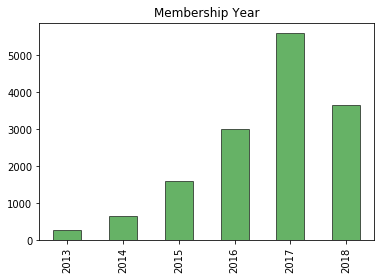

In [66]:
# Plot the number of memberships per year.
# It is increasing every year.  The data only contains up to 20180726,
# so 2018 data is a little over halfway complete.
membership_year_plot = profile_df.membership_year.value_counts().sort_index().plot(kind='bar',
                                  color='g', 
                                  edgecolor='k', 
                                  alpha=0.60, 
                                  title="Membership Year")

In [69]:
#After cleaning
print(profile_df.gender.value_counts())
Male_pct = float(profile_df.gender.value_counts()[0]*1.00/profile_df.gender.value_counts().sum()*1.00)*100
Female_pct = float(profile_df.gender.value_counts()[1]*1.00/profile_df.gender.value_counts().sum()*1.00)*100
print("Male% in original sample: ", Male_pct)
print("Female% in orignal sample: ", Female_pct)

M    8484
F    6129
O     212
Name: gender, dtype: int64
('Male% in original sample: ', 57.227655986509276)
('Female% in orignal sample: ', 41.342327150084316)


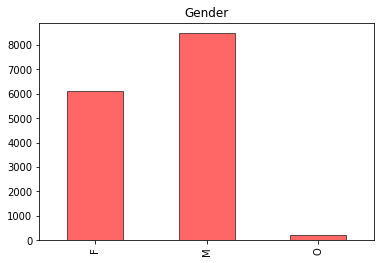

In [70]:
gender_plot = profile_df.gender.value_counts().sort_index().plot(kind='bar',
                                  color='r', 
                                  edgecolor='k', 
                                  alpha=0.60, 
                                  title="Gender")

In [71]:
#Categorical for Age group

profile_df['gender_F'] = profile_df['gender'].apply(lambda x: 1 if 'F' in x else 0)
profile_df['gender_M'] = profile_df['gender'].apply(lambda x: 1 if 'M' in x else 0)
profile_df['gender_O'] = profile_df['gender'].apply(lambda x: 1 if 'O' in x else 0)

#drop channels column
profile_df.drop(['gender'], axis=1, inplace=True) 

In [72]:
profile_df.head()

,id_customer,age,income,membership_days,membership_year,gender_F,gender_M,gender_O
1,399,55.0,112000.0,1247,2017,1,0,0
3,7997,75.0,100000.0,1314,2017,1,0,0
5,15044,68.0,70000.0,962,2018,0,1,0
8,3729,65.0,53000.0,1038,2018,0,1,0
12,3060,58.0,51000.0,1128,2017,0,1,0


In [73]:
#Split Age in Age groups  Old to Young: (Baby Boomer, Gen-X, Millenials, Gen-Z)
# Age group creation 
profile_df['age_group'] = pd.cut(profile_df['age'], bins=[10, 25, 35, 55, 103],
                                    labels=['Gen-Z', 'Millenial', 'Gen-X', 'Baby_Boomer'])

# Categorical Age Group
labels_age_group = profile_df['age_group'].astype('category').cat.categories.tolist()
map_age_group = {'age_group' : {k: v for k,v in zip(labels_age_group,list(range(1,len(labels_age_group)+1)))}}

print(map_age_group)

{'age_group': {'Gen-X': 3, 'Baby_Boomer': 4, 'Gen-Z': 1, 'Millenial': 2}}


In [74]:
profile_df.replace(map_age_group, inplace=True)

In [75]:
profile_df.head()

,id_customer,age,income,membership_days,membership_year,gender_F,gender_M,gender_O,age_group
1,399,55.0,112000.0,1247,2017,1,0,0,3
3,7997,75.0,100000.0,1314,2017,1,0,0,4
5,15044,68.0,70000.0,962,2018,0,1,0,4
8,3729,65.0,53000.0,1038,2018,0,1,0,4
12,3060,58.0,51000.0,1128,2017,0,1,0,4


In [76]:
#OHE for age group

profile_df['Baby_Boomer'] = profile_df['age_group'].apply(lambda x: 1 if x==4 else 0)
profile_df['Gen-X'] = profile_df['age_group'].apply(lambda x: 1 if x==3 else 0)
profile_df['Millenial'] = profile_df['age_group'].apply(lambda x: 1 if x==2 else 0)
profile_df['Gen-Z'] = profile_df['age_group'].apply(lambda x: 1 if x==1 else 0)

In [77]:
profile_df.head()

,id_customer,age,income,membership_days,membership_year,gender_F,gender_M,gender_O,age_group,Baby_Boomer,Gen-X,Millenial,Gen-Z
1,399,55.0,112000.0,1247,2017,1,0,0,3,0,1,0,0
3,7997,75.0,100000.0,1314,2017,1,0,0,4,1,0,0,0
5,15044,68.0,70000.0,962,2018,0,1,0,4,1,0,0,0
8,3729,65.0,53000.0,1038,2018,0,1,0,4,1,0,0,0
12,3060,58.0,51000.0,1128,2017,0,1,0,4,1,0,0,0


In [78]:
#drop age column since we have age group instead
profile_df.drop(['age'], axis=1, inplace=True) 

In [79]:
#drop age column since we have age group instead
profile_df.drop(['age_group'], axis=1, inplace=True) 

In [80]:
profile_df.head()

,id_customer,income,membership_days,membership_year,gender_F,gender_M,gender_O,Baby_Boomer,Gen-X,Millenial,Gen-Z
1,399,112000.0,1247,2017,1,0,0,0,1,0,0
3,7997,100000.0,1314,2017,1,0,0,1,0,0,0
5,15044,70000.0,962,2018,0,1,0,1,0,0,0
8,3729,53000.0,1038,2018,0,1,0,1,0,0,0
12,3060,51000.0,1128,2017,0,1,0,1,0,0,0


In [81]:
#Shape after cleaning
profile_df.shape

(14825, 11)

In [83]:
#saving full dataset to csv for next step: Data analysis and Modeling
profile_df.to_csv('2_clean_profile.csv', index = False)

### 3. Cleaning Transcript

In [84]:
transcript_df.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{u'offer id': u'9b98b8c7a33c4b65b9aebfe6a799e6...
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{u'offer id': u'0b1e1539f2cc45b7b9fa7c272da2e1...
2,offer received,e2127556f4f64592b11af22de27a7932,0,{u'offer id': u'2906b810c7d4411798c6938adc9daa...
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{u'offer id': u'fafdcd668e3743c1bb461111dcafc2...
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{u'offer id': u'4d5c57ea9a6940dd891ad53e9dbe8d...


In [87]:
#Shape before cleaning
transcript_df.shape

(306534, 4)

In [88]:
#rename person to id_customer
transcript_df.rename(columns={'person': 'id_customer'}, inplace=True)

In [90]:
%%time
transcript_df.replace(map_id_customer, inplace=True)

CPU times: user 9min 7s, sys: 3.42 s, total: 9min 11s
Wall time: 9min 10s


In [91]:
transcript_df.head()

,event,id_customer,time,value
0,offer received,7997,0,{u'offer id': u'9b98b8c7a33c4b65b9aebfe6a799e6...
1,offer received,10736,0,{u'offer id': u'0b1e1539f2cc45b7b9fa7c272da2e1...
2,offer received,15044,0,{u'offer id': u'2906b810c7d4411798c6938adc9daa...
3,offer received,9525,0,{u'offer id': u'fafdcd668e3743c1bb461111dcafc2...
4,offer received,6940,0,{u'offer id': u'4d5c57ea9a6940dd891ad53e9dbe8d...


In [92]:
#droping all NA values in trancript for dropped customers earlier with age 118, income and gender Nan
transcript_df = transcript_df[transcript_df.id_customer.isin(profile_df.id_customer.values)]

In [93]:
transcript_df.head()

,event,id_customer,time,value
0,offer received,7997,0,{u'offer id': u'9b98b8c7a33c4b65b9aebfe6a799e6...
2,offer received,15044,0,{u'offer id': u'2906b810c7d4411798c6938adc9daa...
5,offer received,3729,0,{u'offer id': u'f19421c1d4aa40978ebb69ca19b0e2...
7,offer received,3060,0,{u'offer id': u'3f207df678b143eea3cee63160fa8b...
8,offer received,11411,0,{u'offer id': u'0b1e1539f2cc45b7b9fa7c272da2e1...


In [94]:
transcript_df.event.value_counts()

transaction        123957
offer received      66501
offer viewed        49860
offer completed     32444
Name: event, dtype: int64

In [95]:
# replacing the 'event' categorical labels with coressponding numerical label
labels_event = transcript_df['event'].astype('category').cat.categories.tolist()
map_event = {'event' : {k: v for k,v in zip(labels_event,list(range(1,len(labels_event)+1)))}}
print(map_event)


{'event': {u'offer viewed': 3, u'offer completed': 1, u'transaction': 4, u'offer received': 2}}


In [96]:
transcript_df.replace(map_event, inplace=True)

In [97]:
transcript_df.event.value_counts()

4    123957
2     66501
3     49860
1     32444
Name: event, dtype: int64

In [98]:
def get_offer(o):
    if "offer id" in o:
        return o["offer id"]
    elif "offer_id" in o:
        return o["offer_id"]
    else: 
        return np.nan
    
def get_trans_amt(o):
    if "amount" in o:
        return o["amount"]
    else: 
        return 0
    
def get_reward(o):
    if "reward" in o:
        return o["reward"]
    else: 
        return 0
    
def get_offer_completed(o):
    if o==1:
        return 1
    else:
        return 0
    
def get_offer_viewed(o):
    if o==3:
        return 1
    else:
        return 0  

def get_offer_received(o):
    if o==2:
        return 1
    else:
        return 0    
    

In [99]:
#Additional OHE for events (offer completed': 1, 'offer viewed': 2)
transcript_df["event_offer_completed"] = transcript_df.event.apply(lambda val: get_offer_completed(val))
transcript_df["event_offer_viewed"] = transcript_df.event.apply(lambda val: get_offer_viewed(val))
transcript_df["event_offer_received"] = transcript_df.event.apply(lambda val: get_offer_received(val))

In [100]:
transcript_df.head()

,event,id_customer,time,value,event_offer_completed,event_offer_viewed,event_offer_received
0,2,7997,0,{u'offer id': u'9b98b8c7a33c4b65b9aebfe6a799e6...,0,0,1
2,2,15044,0,{u'offer id': u'2906b810c7d4411798c6938adc9daa...,0,0,1
5,2,3729,0,{u'offer id': u'f19421c1d4aa40978ebb69ca19b0e2...,0,0,1
7,2,3060,0,{u'offer id': u'3f207df678b143eea3cee63160fa8b...,0,0,1
8,2,11411,0,{u'offer id': u'0b1e1539f2cc45b7b9fa7c272da2e1...,0,0,1


In [101]:
print(transcript_df.event_offer_received.value_counts())
print(transcript_df.event_offer_viewed.value_counts())
print(transcript_df.event_offer_completed.value_counts())

0    206261
1     66501
Name: event_offer_received, dtype: int64
0    222902
1     49860
Name: event_offer_viewed, dtype: int64
0    240318
1     32444
Name: event_offer_completed, dtype: int64


In [102]:
transcript_df["id_offer"] = transcript_df.value.apply(lambda val: get_offer(val))
transcript_df["trans_amt"] = transcript_df.value.apply(lambda val: get_trans_amt(val))
transcript_df["reward_amt_received"] = transcript_df.value.apply(lambda val: get_reward(val))

In [103]:
transcript_df.head()

,event,id_customer,time,value,event_offer_completed,event_offer_viewed,event_offer_received,id_offer,trans_amt,reward_amt_received
0,2,7997,0,{u'offer id': u'9b98b8c7a33c4b65b9aebfe6a799e6...,0,0,1,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0
2,2,15044,0,{u'offer id': u'2906b810c7d4411798c6938adc9daa...,0,0,1,2906b810c7d4411798c6938adc9daaa5,0.0,0
5,2,3729,0,{u'offer id': u'f19421c1d4aa40978ebb69ca19b0e2...,0,0,1,f19421c1d4aa40978ebb69ca19b0e20d,0.0,0
7,2,3060,0,{u'offer id': u'3f207df678b143eea3cee63160fa8b...,0,0,1,3f207df678b143eea3cee63160fa8bed,0.0,0
8,2,11411,0,{u'offer id': u'0b1e1539f2cc45b7b9fa7c272da2e1...,0,0,1,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,0


In [104]:
transcript_df.drop(['value'], axis=1, inplace=True) 

In [105]:
transcript_df.head()

,event,id_customer,time,event_offer_completed,event_offer_viewed,event_offer_received,id_offer,trans_amt,reward_amt_received
0,2,7997,0,0,0,1,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0
2,2,15044,0,0,0,1,2906b810c7d4411798c6938adc9daaa5,0.0,0
5,2,3729,0,0,0,1,f19421c1d4aa40978ebb69ca19b0e20d,0.0,0
7,2,3060,0,0,0,1,3f207df678b143eea3cee63160fa8bed,0.0,0
8,2,11411,0,0,0,1,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,0


In [106]:
transcript_df.replace(map_id_offer, inplace=True)

In [107]:
transcript_df.head()

,event,id_customer,time,event_offer_completed,event_offer_viewed,event_offer_received,id_offer,trans_amt,reward_amt_received
0,2,7997,0,0,0,1,7.0,0.0,0
2,2,15044,0,0,0,1,3.0,0.0,0
5,2,3729,0,0,0,1,9.0,0.0,0
7,2,3060,0,0,0,1,4.0,0.0,0
8,2,11411,0,0,0,1,1.0,0.0,0


In [110]:
transcript_df = transcript_df[["id_customer", "id_offer", "event_offer_completed", "event_offer_viewed",
                              "event_offer_received","time"]]

In [111]:
transcript_df.head()

,id_customer,id_offer,event_offer_completed,event_offer_viewed,event_offer_received,time
0,7997,7.0,0,0,1,0
2,15044,3.0,0,0,1,0
5,3729,9.0,0,0,1,0
7,3060,4.0,0,0,1,0
8,11411,1.0,0,0,1,0


In [112]:
transcript_df.shape

(272762, 6)

In [113]:
transcript_df.id_offer.value_counts()

10.0    18062
2.0     17920
9.0     16989
8.0     16241
5.0     16232
7.0     14372
3.0     14002
6.0     12516
1.0     12327
4.0     10144
Name: id_offer, dtype: int64

In [114]:
#cleaning and creating a new df with offers valid offer id (between 1 and 10) 
transcript_df_valid_id_offer = transcript_df.loc[(transcript_df['id_offer'] >= 1.0) & (transcript_df['id_offer'] <= 10.0)]

In [115]:
transcript_df_valid_id_offer.shape

(148805, 6)

In [116]:
transcript_df_valid_id_offer.head()

,id_customer,id_offer,event_offer_completed,event_offer_viewed,event_offer_received,time
0,7997,7.0,0,0,1,0
2,15044,3.0,0,0,1,0
5,3729,9.0,0,0,1,0
7,3060,4.0,0,0,1,0
8,11411,1.0,0,0,1,0


In [118]:
#saving full dataset to csv for next step: Data analysis and Modeling
transcript_df_valid_id_offer.to_csv('3_clean_transcript.csv', index = False)

### Now, lets do some feature engineering to create metric (offer Success Metrics)

In [119]:
transcript_df_valid_id_offer.head()

,id_customer,id_offer,event_offer_completed,event_offer_viewed,event_offer_received,time
0,7997,7.0,0,0,1,0
2,15044,3.0,0,0,1,0
5,3729,9.0,0,0,1,0
7,3060,4.0,0,0,1,0
8,11411,1.0,0,0,1,0


In [120]:
transcript_df_valid_id_offer.shape

(148805, 6)

In [121]:
transcript_df_valid_id_offer_copy = transcript_df_valid_id_offer.copy()

In [122]:
def offer_dictionary():

    return {
        'num_times_received': 0,
        'num_times_viewed': 0,
        'num_times_completed': 0
    }

def customer_dictionary():

    return {
        'offers': defaultdict(lambda: offer_dictionary())
 
    }


In [123]:
# Initialize customer offer dictionary.
customer_offer_dictionary = defaultdict(lambda: customer_dictionary())

In [124]:
for eachrow in transcript_df_valid_id_offer_copy.itertuples(index=False):
    
    cust_id = eachrow.id_customer
    offer_id = eachrow.id_offer
    offer_received = eachrow.event_offer_received
    offer_view = eachrow.event_offer_viewed
    offer_complete = eachrow.event_offer_completed
   
    if offer_received :
        customer_offer_dictionary[cust_id]['offers'][offer_id]['num_times_received'] += 1
    elif offer_view:
        customer_offer_dictionary[cust_id]['offers'][offer_id]['num_times_viewed'] += 1
    elif offer_complete:
        customer_offer_dictionary[cust_id]['offers'][offer_id]['num_times_completed'] += 1
        
    


In [125]:
transcript_df_valid_id_offer_copy['num_times_received'] = transcript_df_valid_id_offer_copy.apply(lambda row: 
            customer_offer_dictionary[row['id_customer']]['offers'][row['id_offer']]['num_times_received'], axis=1)
transcript_df_valid_id_offer_copy['num_times_viewed'] = transcript_df_valid_id_offer_copy.apply(lambda row: 
            customer_offer_dictionary[row['id_customer']]['offers'][row['id_offer']]['num_times_viewed'], axis=1)
transcript_df_valid_id_offer_copy['num_times_completed'] = transcript_df_valid_id_offer_copy.apply(lambda row: 
            customer_offer_dictionary[row['id_customer']]['offers'][row['id_offer']]['num_times_completed'], axis=1)

In [126]:
transcript_df_valid_id_offer_copy.head()

,id_customer,id_offer,event_offer_completed,event_offer_viewed,event_offer_received,time,num_times_received,num_times_viewed,num_times_completed
0,7997,7.0,0,0,1,0,1,1,1
2,15044,3.0,0,0,1,0,1,1,0
5,3729,9.0,0,0,1,0,2,2,2
7,3060,4.0,0,0,1,0,1,0,0
8,11411,1.0,0,0,1,0,1,1,0


In [127]:
# Shape before cleaning
print("Before secondary cleaning, transcript has shape :",  transcript_df_valid_id_offer_copy.shape)

# I can now drop multiple columns from transcript.
transcript_df_valid_id_offer_copy.drop(columns=['event_offer_received', 'event_offer_viewed', 'event_offer_completed'], inplace=True, axis=1)
transcript_df_valid_id_offer_copy.drop_duplicates(inplace=True)

# Shape after cleaning
print("After secondary cleaning, transcript has shape: ", transcript_df_valid_id_offer_copy.shape)


('Before secondary cleaning, transcript has shape :', (148805, 9))
('After secondary cleaning, transcript has shape: ', (133674, 6))


In [128]:
transcript_df_valid_id_offer_copy['offer_successful'] = transcript_df_valid_id_offer_copy.apply(lambda row: 1 if row['num_times_completed'] else 0, axis=1)


# Drop all rows where id_offer is NaN.
transcript_df_valid_id_offer_copy.drop(transcript_df_valid_id_offer_copy[transcript_df_valid_id_offer_copy.id_offer.isnull()].index, inplace=True)

In [129]:
print("The shape :" , transcript_df_valid_id_offer_copy.shape)

('The shape :', (133674, 7))


In [130]:
transcript_df_valid_id_offer_copy.head(20)

,id_customer,id_offer,time,num_times_received,num_times_viewed,num_times_completed,offer_successful
0,7997,7.0,0,1,1,1,1
2,15044,3.0,0,1,1,0,0
5,3729,9.0,0,2,2,2,1
7,3060,4.0,0,1,0,0,0
8,11411,1.0,0,1,1,0,0
9,3275,1.0,0,1,1,0,0
12,4997,8.0,0,2,2,1,1
13,12985,4.0,0,2,2,0,0
14,14193,1.0,0,2,2,2,1
15,16459,10.0,0,2,2,2,1


In [131]:
# Percent of offers that were successful
offer_success_rate = float(transcript_df_valid_id_offer_copy.offer_successful.sum() * 1.00 / transcript_df_valid_id_offer_copy.offer_successful.count() * 1.00 )
print("Offer Succes Rate: ", offer_success_rate)


('Offer Succes Rate: ', 0.6313942875951942)


In [132]:
clean_transcript_df_2 = transcript_df_valid_id_offer_copy.copy()

In [133]:
clean_transcript_df_2.head()

,id_customer,id_offer,time,num_times_received,num_times_viewed,num_times_completed,offer_successful
0,7997,7.0,0,1,1,1,1
2,15044,3.0,0,1,1,0,0
5,3729,9.0,0,2,2,2,1
7,3060,4.0,0,1,0,0,0
8,11411,1.0,0,1,1,0,0


In [134]:
#saving full dataset to csv for next step: Data analysis and Modeling
clean_transcript_df_2.to_csv('3_clean_transcript.csv', index = False)

In [135]:
transcript_df = clean_transcript_df_2.copy()

## Combine all dataset into one

In [136]:
# Merge them together.
clean_master_df = pd.merge(transcript_df, portfolio_df, how='left', on="id_offer")
clean_master_df = pd.merge(clean_master_df, profile_df, how='left', on="id_customer")

In [137]:
clean_master_df.head()

,id_customer,id_offer,time,num_times_received,num_times_viewed,num_times_completed,offer_successful,reward,duration,difficulty,...,income,membership_days,membership_year,gender_F,gender_M,gender_O,Baby_Boomer,Gen-X,Millenial,Gen-Z
0,7997,7.0,0,1,1,1,1,5,7,5,...,100000.0,1314,2017,1,0,0,1,0,0,0
1,15044,3.0,0,1,1,0,0,2,7,10,...,70000.0,962,2018,0,1,0,1,0,0,0
2,3729,9.0,0,2,2,2,1,5,5,5,...,53000.0,1038,2018,0,1,0,1,0,0,0
3,3060,4.0,0,1,0,0,0,0,4,0,...,51000.0,1128,2017,0,1,0,1,0,0,0
4,11411,1.0,0,1,1,0,0,5,10,20,...,57000.0,1189,2017,1,0,0,1,0,0,0


In [138]:
clean_master_df.shape

(133674, 27)

In [139]:
#Dropping the time column
clean_master_df.drop(columns=['time'], inplace=True, axis=1)


In [140]:
clean_master_df.shape

(133674, 26)

In [143]:
clean_master_df.head()

,id_customer,id_offer,num_times_received,num_times_viewed,num_times_completed,offer_successful,reward,duration,difficulty,email,...,income,membership_days,membership_year,gender_F,gender_M,gender_O,Baby_Boomer,Gen-X,Millenial,Gen-Z
0,7997,7.0,1,1,1,1,5,7,5,1,...,100000.0,1314,2017,1,0,0,1,0,0,0
1,15044,3.0,1,1,0,0,2,7,10,1,...,70000.0,962,2018,0,1,0,1,0,0,0
2,3729,9.0,2,2,2,1,5,5,5,1,...,53000.0,1038,2018,0,1,0,1,0,0,0
3,3060,4.0,1,0,0,0,0,4,0,1,...,51000.0,1128,2017,0,1,0,1,0,0,0
4,11411,1.0,1,1,0,0,5,10,20,1,...,57000.0,1189,2017,1,0,0,1,0,0,0


In [144]:
clean_master_df.drop_duplicates(inplace=True)

In [145]:
# Percent of offers that were successful
offer_success_rate = float(clean_master_df.offer_successful.sum() * 1.00 / clean_master_df.offer_successful.count() * 1.00 )
print("Offer Succes Rate: ", offer_success_rate)

('Offer Succes Rate: ', 0.5059939879033718)


In [157]:
#saving master full dataset to csv for next step: Data analysis and Modeling
clean_master_df.to_csv('4_clean_master.csv', index = False)

## Analyze the cleaned dataset and infer some findings from existing data

In [159]:
clean_master_df.head()

,id_customer,id_offer,num_times_received,num_times_viewed,num_times_completed,offer_successful,reward,duration,difficulty,email,...,income,membership_days,membership_year,gender_F,gender_M,gender_O,Baby_Boomer,Gen-X,Millenial,Gen-Z
0,7997,7.0,1,1,1,1,5,7,5,1,...,100000.0,1314,2017,1,0,0,1,0,0,0
1,15044,3.0,1,1,0,0,2,7,10,1,...,70000.0,962,2018,0,1,0,1,0,0,0
2,3729,9.0,2,2,2,1,5,5,5,1,...,53000.0,1038,2018,0,1,0,1,0,0,0
3,3060,4.0,1,0,0,0,0,4,0,1,...,51000.0,1128,2017,0,1,0,1,0,0,0
4,11411,1.0,1,1,0,0,5,10,20,1,...,57000.0,1189,2017,1,0,0,1,0,0,0


In [160]:
clean_master_df.shape

(55222, 26)

In [161]:
clean_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55222 entries, 0 to 119945
Data columns (total 26 columns):
id_customer            55222 non-null int64
id_offer               55222 non-null float64
num_times_received     55222 non-null int64
num_times_viewed       55222 non-null int64
num_times_completed    55222 non-null int64
offer_successful       55222 non-null int64
reward                 55222 non-null int64
duration               55222 non-null int64
difficulty             55222 non-null int64
email                  55222 non-null int64
mobile                 55222 non-null int64
social                 55222 non-null int64
web                    55222 non-null int64
offer_bogo             55222 non-null int64
offer_discount         55222 non-null int64
offer_informational    55222 non-null int64
income                 55222 non-null float64
membership_days        55222 non-null int64
membership_year        55222 non-null int64
gender_F               55222 non-null int64
gender

In [162]:
clean_master_df.describe()

,id_customer,id_offer,num_times_received,num_times_viewed,num_times_completed,offer_successful,reward,duration,difficulty,email,...,income,membership_days,membership_year,gender_F,gender_M,gender_O,Baby_Boomer,Gen-X,Millenial,Gen-Z
count,55222.000000,55222.000000,55222.000000,55222.000000,55222.000000,55222.000000,55222.000000,55222.000000,55222.000000,55222.0,...,55222.000000,55222.000000,55222.000000,55222.000000,55222.000000,55222.000000,55222.000000,55222.000000,55222.000000,55222.000000
mean,8506.385299,5.496831,1.204248,0.902901,0.587519,0.505994,4.204737,6.508239,7.718554,1.0,...,65388.595125,1392.272084,2016.624371,0.413024,0.573051,0.013926,0.495364,0.342834,0.093206,0.068596
std,4908.170455,2.874461,0.453029,0.616462,0.647818,0.499969,3.402301,2.205656,5.547981,0.0,...,21626.373809,419.339533,1.198498,0.492381,0.494639,0.117183,0.499983,0.474661,0.290723,0.252768
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.0,...,30000.000000,871.000000,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4261.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.000000,5.000000,5.000000,1.0,...,49000.000000,1078.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8512.000000,6.000000,1.000000,1.000000,1.000000,1.000000,5.000000,7.000000,10.000000,1.0,...,63000.000000,1228.000000,2017.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12746.000000,8.000000,1.000000,1.000000,1.000000,1.000000,5.000000,7.000000,10.000000,1.0,...,80000.000000,1667.000000,2017.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,17000.000000,10.000000,5.000000,5.000000,4.000000,1.000000,10.000000,10.000000,20.000000,1.0,...,120000.000000,2694.000000,2018.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [2]:
#Cleaned & feature engineered master combined dataset for modeling later with categorical values and OHE
master_df = pd.read_csv("4_clean_master.csv")

In [3]:
female_gender_offer_df = master_df.groupby(['gender_F','offer_successful']).count()
male_gender_offer_df = master_df.groupby(['gender_M','offer_successful']).count()

In [4]:
#Male Offer Success Rate:
a=male_gender_offer_df['id_customer'].values
MSR = float(a[3]*1.00/(a[2]+a[3])*1.00)
print("Male Offer Success Rate = ", MSR)

#Female Offer Success Rate:
b=female_gender_offer_df['id_customer'].values
FSR = float(b[3]*1.00/(b[2]+b[3])*1.00)
print("Female Offer Success Rate = ", FSR)

('Male Offer Success Rate = ', 0.4504345078211408)
('Female Offer Success Rate = ', 0.5813311118905647)


### Females respond to offers better than Males (Female: 58% and Male:45%)

In [5]:
#Total Offer_Success_Rate
TSR=float(master_df.offer_successful.sum()*1.00 / master_df.offer_successful.count()*1.00)
print("Total Offer Success Rate = ", TSR)

('Total Offer Success Rate = ', 0.5059939879033718)


In [6]:
bb_gender_offer_df = master_df.groupby(['Baby_Boomer','offer_successful']).count()
genx_gender_offer_df = master_df.groupby(['Gen-X','offer_successful']).count()
mill_gender_offer_df = master_df.groupby(['Millenial','offer_successful']).count()
genz_gender_offer_df = master_df.groupby(['Gen-Z','offer_successful']).count()

In [10]:
#Babyboomer Offer Success Rate:
a=bb_gender_offer_df['id_customer'].values
BBSR = float(a[3]*1.00/(a[2]+a[3])*1.00)
print("Baby Boomer Offer Success Rate = ", BBSR)

#Gen-X Offer Success Rate:
a=genx_gender_offer_df['id_customer'].values
GenXSR = float(a[3]*1.00/(a[2]+a[3])*1.00)
print("Gen X Offer Success Rate = ", GenXSR)

#Millenials Offer Success Rate:
a=mill_gender_offer_df['id_customer'].values
MillXSR = float(a[3]*1.00/(a[2]+a[3])*1.00)
print("Millenial Offer Success Rate = ", MillXSR)

#nZ GeOffer Success Rate:
a=genz_gender_offer_df['id_customer'].values
GenZSR = float(a[3]*1.00/(a[2]+a[3])*1.00)
print("Gen Z Offer Success Rate = ", GenZSR)


('Baby Boomer Offer Success Rate = ', 0.5356973131054652)
('Gen X Offer Success Rate = ', 0.5096661736742024)
('Millenial Offer Success Rate = ', 0.4204390907324655)
('Gen Z Offer Success Rate = ', 0.38938753959873285)
